 #                                         Speech-To-Text

In [5]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

%matplotlib inline

### Spectrogram

#### In below blog they tried with sample of wave file 
        https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/

#### Lets try with other feature like spectrogram
        Data : https://www.kaggle.com/c/tensorflow-speech-recognition-challenge

In [6]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'

In [7]:
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

<ipython-input-8-65a2609ef5c5>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


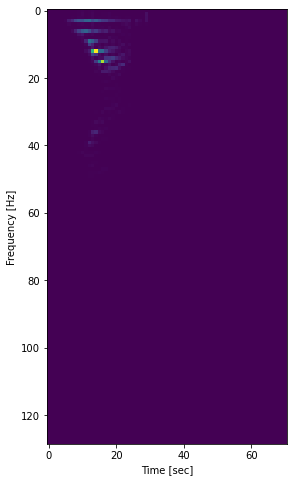

In [8]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_1.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [9]:
spectrogram

array([[2.6156293e-02, 2.2892055e-01, 3.6966115e-02, ..., 1.8147479e-01,
        5.3385958e-02, 3.5170719e-02],
       [1.7347100e-01, 1.7421755e+00, 5.0767148e-01, ..., 8.8913023e-01,
        9.8591708e-02, 1.7330437e+00],
       [1.0945344e+01, 1.0747066e+01, 1.0305539e+01, ..., 6.8501520e+00,
        2.5501971e+00, 4.5086515e-01],
       ...,
       [1.5865684e-05, 3.1484353e-05, 2.7274358e-05, ..., 7.0329854e-08,
        7.8394805e-05, 3.5176196e-05],
       [5.3697636e-06, 6.5488912e-06, 6.6068346e-06, ..., 3.7657367e-06,
        2.0339318e-07, 1.5106043e-05],
       [8.8035231e-06, 8.2444130e-06, 1.4490608e-05, ..., 4.8090528e-06,
        8.5944828e-07, 2.0338655e-06]], dtype=float32)

### Load Audio Data

In [10]:
data = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        files = os.listdir(os.path.join(audios_dir,d))
        audios = [f for f in files if f.endswith('.wav')]
        for file in audios:
            # load the image, swap color channels, and resize it to be a fixed
            # 224x224 pixels while ignoring aspect ratio
            #file = audios[i]
            sample_rate, samples = wavfile.read(os.path.join(audios_dir,d,file))
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

            # convert the image data to NumPy arrays while scaling the pixel
            # intensities to the range [0, 255]
            #image = np.array(image)/255.0
            
            # update the data and labels lists, respectively
            if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=48:
                data.append(spectrogram[:128,:48])
                labels.append(d)
            #else:
             #   print(spectrogram.shape)


down
go
left


In [ ]:
data = np.array(data)

In [ ]:
data.shape

(23455, 128, 48)

### Class distribution

In [ ]:
values,count = np.unique(labels,return_counts=True)

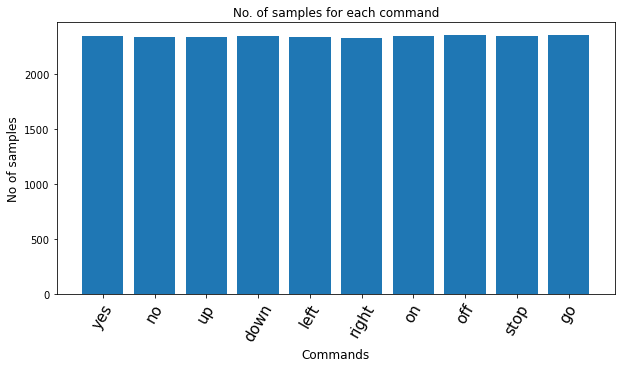

In [ ]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10,5))
index = np.arange(len(words))
plt.bar(index, count)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of samples', fontsize=12)
plt.xticks(index, words, fontsize=15, rotation=60)
plt.title('No. of samples for each command')
plt.show()

In [ ]:
len(labels)

23455

In [ ]:
labels_backup = labels

In [ ]:
# convert the labels to NumPy arrays while scaling the pixel
labels = np.array(labels)

In [ ]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ls = le.fit_transform(labels)

In [ ]:
labels_categoricals = to_categorical(ls)

In [ ]:
labels_categoricals

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
labels_categoricals.shape

(23455, 10)

### Data splitting - Train,CV and Test 

In [ ]:
# partition the data into training,cross-validation and testing splits using 60%,20% and 20% of data
(trainX, testX, trainY, testY) = train_test_split(data, labels_categoricals,test_size=0.20, stratify=labels_categoricals, random_state=42)
(trainX, cvX, trainY, cvY) = train_test_split(trainX, trainY,test_size=0.25, stratify=trainY, random_state=42)

In [ ]:
print("Train data size : ",trainX.shape)
print("Cross-Validation data size : ",cvX.shape)
print("Test data size : ",testX.shape)

Train data size :  (14073, 128, 48)
Cross-Validation data size :  (4691, 128, 48)
Test data size :  (4691, 128, 48)


In [ ]:
del data
del labels_categoricals

In [ ]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    cvX = cvX.reshape(cvX.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0],img_rows, img_cols,1)
    testX = testX.reshape(testX.shape[0],img_rows, img_cols,1)
    cvX = cvX.reshape(cvX.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [ ]:
print("Number of training examples :", trainX.shape[0], "and each image is of shape :",trainX.shape)
print("Number of cross validation examples :", cvX.shape[0], "and each image is of shape :",cvX.shape)
print("Number of testing examples :", testX.shape[0], "and each image is of shape :",testX.shape)

Number of training examples : 14073 and each image is of shape : (14073, 128, 48, 1)
Number of cross validation examples : 4691 and each image is of shape : (4691, 128, 48, 1)
Number of testing examples : 4691 and each image is of shape : (4691, 128, 48, 1)


### VGG16 Model

In [ ]:
!pip install nvidia-ml-py3 

In [ ]:
import tensorflow as tf

In [ ]:

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")

In [ ]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:

#initialize the initial learning rate, number of epochs to train for and batch size
INIT_LR = 1e-3
EPOCHS = 150
batch_size = 32
num_class = 10
#input_shape = (224,224,3) #(513, 800, 3)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from tensorflow.keras.layers import (BatchNormalization)

from keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 48, 8)        40        
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 48, 16)       528       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 24, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 64, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64, 24, 16)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 24, 32)       

In [ ]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
!nvidia-smi

Fri Jul  8 13:07:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.59       Driver Version: 516.59       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8    11W /  N/A |   4701MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/150
440/440 [==============================] - 12s 27ms/step - loss: 2.6687 - accuracy: 0.1070 - val_loss: 2.3210 - val_accuracy: 0.1053
Epoch 2/150
440/440 [==============================] - 10s 23ms/step - loss: 2.3106 - accuracy: 0.1064 - val_loss: 2.3008 - val_accuracy: 0.1123
Epoch 3/150
440/440 [==============================] - 10s 23ms/step - loss: 2.3011 - accuracy: 0.1074 - val_loss: 2.6309 - val_accuracy: 0.1045
Epoch 4/150
440/440 [==============================] - 10s 23ms/step - loss: 2.2870 - accuracy: 0.1115 - val_loss: 2.5686 - val_accuracy: 0.1081
Epoch 5/150
440/440 [==============================] - 10s 24ms/step - loss: 2.2678 - accuracy: 0.1229 - val_loss: 3.8156 - val_accuracy: 0.1010
Epoch 6/150
440/440 [==============================] - 11s 25ms/step - loss: 2.2410 - accuracy: 0.1431 - val_loss: 2.9439 - val_accuracy: 0.1198
Epoch 7/150
440/440 [==============================] - 11s 26ms/step - loss: 2.2110 - accuracy: 0.1455 - val_loss: 2.7109 - val_ac

In [ ]:
import pickle

In [ ]:
# plot the training loss
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train/CV Loss on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

NameError: name 'plt' is not defined

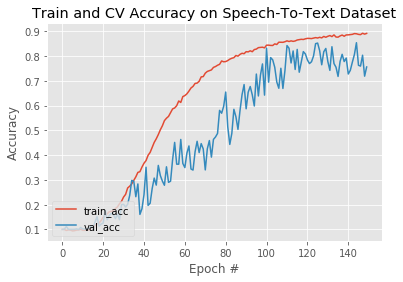

In [ ]:
# plot the training accuracy
N = EPOCHS
#plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train and CV Accuracy on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [ ]:
best_acc = max(history.history["val_accuracy"])

In [ ]:
best_acc*100

85.4188859462738

In [ ]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=batch_size)

NameError: name 'model' is not defined

In [ ]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
def plot_Confusion_Matrix(actual_labels,predict_labels,title):
    """This function plot the confusion matrix"""
    # Reference : https://seaborn.pydata.org/generated/seaborn.heatmap.html
    cm = confusion_matrix(actual_labels, predict_labels)
    classNames = words
    cm_data = pd.DataFrame(cm,index = classNames,
                  columns = classNames)
    plt.figure(figsize = (8,8))
    sns.heatmap(cm_data, annot=True,fmt="d")
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


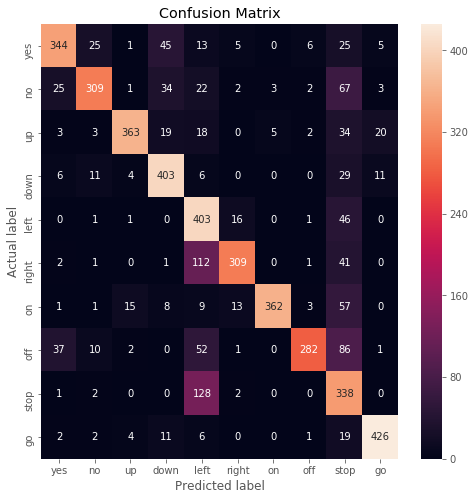

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

plot_Confusion_Matrix(testY.argmax(axis=1), predIdxs,"Confusion Matrix")

## Results

In [ ]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Results "
ptable.field_names = ["Mode",'Sample size','Accuracy']
ptable.add_row(["Train","14073","89.03"])
ptable.add_row(["Cross-Validation","4691","85.41"])
ptable.add_row(["Test","4691","85.44"])
print(ptable)

+-------------------------------------------+
|               Model Results               |
+------------------+-------------+----------+
|       Mode       | Sample size | Accuracy |
+------------------+-------------+----------+
|      Train       |    14073    |  89.03   |
| Cross-Validation |     4691    |  85.41   |
|       Test       |     4691    |  85.44   |
+------------------+-------------+----------+
